In [2]:
import tensorflow as tf
import numpy as py
import matplotlib as plt

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

fig, ax = plt.subplots(10,10)

k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(mnist.train.images[k].reshape(28,28), aspect='auto')
        k += 1
plt.show()

ModuleNotFoundError: No module named 'tensorflow.examples'

In [3]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.8.0


In [4]:
# REMOVE the old import
# from tensorflow.examples.tutorials.mnist import input_data

from tensorflow.keras.datasets import mnist


In [5]:
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("x_train:", x_train.shape, x_train.dtype)
print("y_train:", y_train.shape, y_train.dtype)
print("x_test :", x_test.shape,  x_test.dtype)
print("y_test :", y_test.shape,  y_test.dtype)

print("pixel range:", x_train.min(), "to", x_train.max())


x_train: (60000, 28, 28) uint8
y_train: (60000,) uint8
x_test : (10000, 28, 28) uint8
y_test : (10000,) uint8
pixel range: 0 to 255


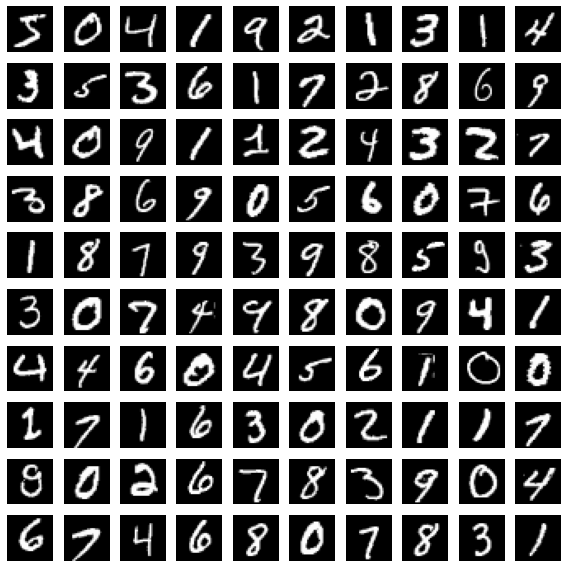

In [6]:
fig, ax = plt.subplots(10, 10, figsize=(8, 8))

k = 0
for i in range(10):
    for j in range(10):
        ax[i, j].imshow(x_train[k], cmap="gray")
        ax[i, j].axis("off")
        k += 1

plt.tight_layout()
plt.show()


In [7]:
print("Shape of feature matrix:", mnist.train.images.shape)

AttributeError: module 'keras.api._v2.keras.datasets.mnist' has no attribute 'train'

In [8]:
print("Shape of feature matrix:", x_train.shape)


Shape of feature matrix: (60000, 28, 28)


In [9]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat  = x_test.reshape(x_test.shape[0], -1)

print("x_train_flat:", x_train_flat.shape)
print("x_test_flat :", x_test_flat.shape)


x_train_flat: (60000, 784)
x_test_flat : (10000, 784)


In [10]:
from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train, num_classes=10)
y_test_oh  = to_categorical(y_test, num_classes=10)

print("y_train_oh:", y_train_oh.shape, y_train_oh.dtype)
print("y_test_oh :", y_test_oh.shape,  y_test_oh.dtype)

print("first label raw:", y_train[0])
print("first label one-hot:", y_train_oh[0])


y_train_oh: (60000, 10) float32
y_test_oh : (10000, 10) float32
first label raw: 5
first label one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


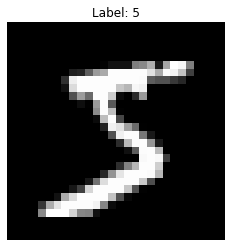

In [11]:
idx = 0

plt.imshow(x_train_flat[idx].reshape(28, 28), cmap="gray")
plt.title(f"Label: {y_train[idx]}")
plt.axis("off")
plt.show()


In [12]:
print("Shape of target matrix:", mnist.train.labels.shape)

AttributeError: module 'keras.api._v2.keras.datasets.mnist' has no attribute 'train'

In [13]:
print("Shape of target matrix:", y_train_oh.shape)


Shape of target matrix: (60000, 10)


In [14]:
print("FEATURES (x_train_flat):", x_train_flat.shape)
print("TARGETS  (y_train_oh)  :", y_train_oh.shape)


FEATURES (x_train_flat): (60000, 784)
TARGETS  (y_train_oh)  : (60000, 10)


In [15]:
x_train_norm = x_train_flat.astype("float32") / 255.0
x_test_norm  = x_test_flat.astype("float32") / 255.0

print("range after normalize:", x_train_norm.min(), "to", x_train_norm.max())
print("dtype:", x_train_norm.dtype)


range after normalize: 0.0 to 1.0
dtype: float32


In [16]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

print("Compiled OK")


Compiled OK


In [18]:
history = model.fit(
    x_train_norm, y_train_oh,
    epochs=1,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)


422/422 [==============================] - 1s 2ms/step - loss: 0.3735 - accuracy: 0.8989 - val_loss: 0.1738 - val_accuracy: 0.9525


In [19]:
test_loss, test_acc = model.evaluate(x_test_norm, y_test_oh, verbose=0)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)


Test loss: 0.2019115537405014
Test accuracy: 0.9435999989509583


In [20]:
history2 = model.fit(
    x_train_norm, y_train_oh,
    epochs=4,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)


Epoch 1/4
422/422 [==============================] - 1s 1ms/step - loss: 0.1758 - accuracy: 0.9491 - val_loss: 0.1269 - val_accuracy: 0.9665
Epoch 2/4
422/422 [==============================] - 1s 1ms/step - loss: 0.1267 - accuracy: 0.9641 - val_loss: 0.1057 - val_accuracy: 0.9707
Epoch 3/4
422/422 [==============================] - 1s 2ms/step - loss: 0.0983 - accuracy: 0.9711 - val_loss: 0.0893 - val_accuracy: 0.9740
Epoch 4/4
422/422 [==============================] - 1s 2ms/step - loss: 0.0783 - accuracy: 0.9773 - val_loss: 0.0842 - val_accuracy: 0.9765


In [21]:
test_loss, test_acc = model.evaluate(x_test_norm, y_test_oh, verbose=0)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)


Test loss: 0.08877088874578476
Test accuracy: 0.9739999771118164


Predicted: [7 2 1 0 4 1 4 9 6 9]
Actual   : [7 2 1 0 4 1 4 9 5 9]


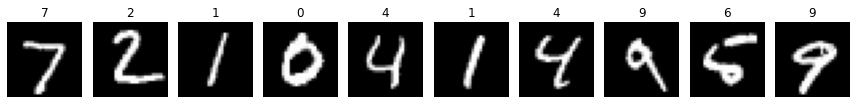

In [22]:
import numpy as np
import matplotlib.pyplot as plt

pred = model.predict(x_test_norm[:10], verbose=0)
pred_labels = np.argmax(pred, axis=1)

print("Predicted:", pred_labels)
print("Actual   :", y_test[:10])

fig, ax = plt.subplots(1, 10, figsize=(12, 2))
for i in range(10):
    ax[i].imshow(x_test[i], cmap="gray")
    ax[i].set_title(str(pred_labels[i]))
    ax[i].axis("off")
plt.tight_layout()
plt.show()


In [26]:
print("One-hot encoding for 1st observation:\n", y_train_oh[0])

One-hot encoding for 1st observation:
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [27]:
#To Create Tensorflow object
x = tf.placeholder("float", [None, 784]) # train set
W = tf.Variable(tf.zeros([784,10])) # weight
b = tf.Variable(tf.zeros([10])) # bias

y = tf.nn.softmax(tf.matmul(x,W) + b)    #Finding wei
y_ = tf.placeholder("float", [None,10])
cross_entropy = -tf.reduce_sum(y_*tf.log(y))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [28]:
import tensorflow as tf

tf.compat.v1.disable_eager_execution()
print("Eager execution disabled. Using TF1-style graph mode.")


Eager execution disabled. Using TF1-style graph mode.


In [29]:
x = tf.compat.v1.placeholder(tf.float32, [None, 784])
print("x placeholder created:", x)


x placeholder created: Tensor("Placeholder:0", shape=(None, 784), dtype=float32)


In [30]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

y = tf.nn.softmax(tf.matmul(x, W) + b)
print("W:", W)
print("b:", b)
print("y:", y)


W: <tf.Variable 'Variable:0' shape=(784, 10) dtype=float32>
b: <tf.Variable 'Variable_1:0' shape=(10,) dtype=float32>
y: Tensor("Softmax:0", shape=(None, 10), dtype=float32)


In [31]:
y_ = tf.compat.v1.placeholder(tf.float32, [None, 10])
print("y_ placeholder created:", y_)


y_ placeholder created: Tensor("Placeholder_1:0", shape=(None, 10), dtype=float32)


In [32]:
cross_entropy = -tf.reduce_sum(y_ * tf.math.log(y + 1e-10))
print("cross_entropy tensor:", cross_entropy)


cross_entropy tensor: Tensor("Neg:0", shape=(), dtype=float32)


In [33]:
train_step = tf.compat.v1.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
print("train_step op:", train_step)


train_step op: name: "GradientDescent"
op: "NoOp"
input: "^GradientDescent/update_Variable/ResourceApplyGradientDescent"
input: "^GradientDescent/update_Variable_1/ResourceApplyGradientDescent"



In [34]:
init = tf.compat.v1.global_variables_initializer()
sess = tf.compat.v1.Session()
sess.run(init)

print("Session started and variables initialized ✅")


Session started and variables initialized ✅


In [35]:
import numpy as np

def next_batch(batch_size, X, Y):
    idx = np.random.choice(X.shape[0], batch_size, replace=False)
    return X[idx], Y[idx]

print("next_batch ready ✅")


next_batch ready ✅


In [36]:
batch_xs, batch_ys = next_batch(100, x_train_norm, y_train_oh)

sess.run(
    train_step,
    feed_dict={x: batch_xs, y_: batch_ys}
)

print("One training step completed ✅")


One training step completed ✅


In [37]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print("accuracy op ready ✅")


accuracy op ready ✅


In [38]:
acc = sess.run(accuracy, feed_dict={x: x_test_norm, y_: y_test_oh})
print("Test accuracy right now:", acc)


Test accuracy right now: 0.3679


In [39]:
for i in range(1000):
    batch_xs, batch_ys = next_batch(100, x_train_norm, y_train_oh)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

    if i % 100 == 0:
        acc = sess.run(accuracy, feed_dict={x: batch_xs, y_: batch_ys})
        print("step", i, "training batch accuracy", acc)

print("Loop done ✅")


step 0 training batch accuracy 0.42
step 100 training batch accuracy 0.93
step 200 training batch accuracy 0.96
step 300 training batch accuracy 0.96
step 400 training batch accuracy 0.93
step 500 training batch accuracy 0.92
step 600 training batch accuracy 0.95
step 700 training batch accuracy 0.94
step 800 training batch accuracy 0.91
step 900 training batch accuracy 0.91
Loop done ✅


In [40]:
final_acc = sess.run(accuracy, feed_dict={x: x_test_norm, y_: y_test_oh})
print("Final test accuracy:", final_acc)


Final test accuracy: 0.9098


In [42]:
for i in range(1000):
    batch_xs, batch_ys = next_batch(100, x_train_norm, y_train_oh)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})


In [43]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))  # compare prediction vs true label
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print(sess.run(accuracy, feed_dict={x: x_test_norm, y_: y_test_oh}))


0.9151
